<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-up-environment" data-toc-modified-id="Set-up-environment-1">Set up environment</a></span></li><li><span><a href="#Overview-of-Scenario-Delta" data-toc-modified-id="Overview-of-Scenario-Delta-2">Overview of Scenario Delta</a></span></li><li><span><a href="#Uncontrolled-Case" data-toc-modified-id="Uncontrolled-Case-3">Uncontrolled Case</a></span></li><li><span><a href="#Example-Control-Strategy-A" data-toc-modified-id="Example-Control-Strategy-A-4">Example Control Strategy A</a></span></li><li><span><a href="#Example-Control-Strategy-B-(todo)" data-toc-modified-id="Example-Control-Strategy-B-(todo)-5">Example Control Strategy B (todo)</a></span></li><li><span><a href="#Contents-of-configuration-file-for-Scenario-Delta" data-toc-modified-id="Contents-of-configuration-file-for-Scenario-Delta-6">Contents of configuration file for Scenario Delta</a></span></li><li><span><a href="#Code-button-box" data-toc-modified-id="Code-button-box-7">Code button box</a></span></li></ul></div>

## Set up environment 

In [1]:
# Import python libraries 
import pystorms 
# Python Scientific Computing Stack
import numpy as np
import pandas as pd
# Plotting tools
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# set seaborn figure preferences and colors
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")
colorpalette = sns.color_palette("colorblind")
colors_hex = colorpalette.as_hex()

In [3]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

## Overview of Scenario Delta

The `config.yaml` file lists the specifics for `Scenario Delta`. The contents of this file are copied into a cell at the end of this notebook.

`Scenario Delta` is a subnetwork of connected storage basins with controllable outlet weirs in a residential neighborhood. The majority of the storage basins serve a dual purpose -- part of the broader network's stormwater control as well as waterfront to the homes in the community. Thus, the control objective is to keep the water level at each of the basins within a pre-specified range. The south basin serves as an infiltration basin, thus, only has a maximum depth with inflow from an inlet weir. The ranges of acceptable depths for the five basins are listed in the following table:


|              | __Target depth__ | __Upper Depth Limit__ | __Lower Depth Limit__ | __Upper Depth Sublimit__ | __Lower Depth Sublimit__ |
|--------------|------|-------|------|------|------|
|North Basin 3 | 5.42 | 11.99 | 5.28 | 5.92 | 5.32 |
|North Basin 2 | 4.54 | 6.59  | 4.04 | 5.04 | 4.44 |
|North Basin 1 | 5.3  | 5.92  | 2.11 | 5.8  | 5.2  |
|Central Basin | 3.38 | 5.7   | 2.21 | 3.8  | 3.28 |
|South Basin   | 6.5  | 9.5   | 0.0  | 6.55 | 0.0  |

The outlet of this subnetwork connects the subnetwork to the broader network. There is a specified limit of XX for the outflow of this subnetwork to the broader network. Additionally, there is a constant inflow into the network at node XX.

## Uncontrolled Case

We run `Scenario Delta` without any control, first with weirs set to `100%` open.

In [4]:
################################################################################
# Uncontrolled performance - control asset settings are set to all ones
################################################################################
env_uncontrolled_ones = pystorms.scenarios.delta()
done = False
actions = np.ones(5)
while not done:
    done = env_uncontrolled_ones.step(actions)
uncontrolled_perf_ones = sum(env_uncontrolled_ones.data_log["performance_measure"])

The performance for this case is computed to be the following:

In [6]:
print("\nThe calculated performance for the uncontrolled case of Scenario Delta is: {}.".format(uncontrolled_perf_ones))
#


The calculated performance for the uncontrolled case of Scenario Delta is: 177043801214.479.


We can look at a plot of the behavior of our stormwater network at relevent locations as follows:

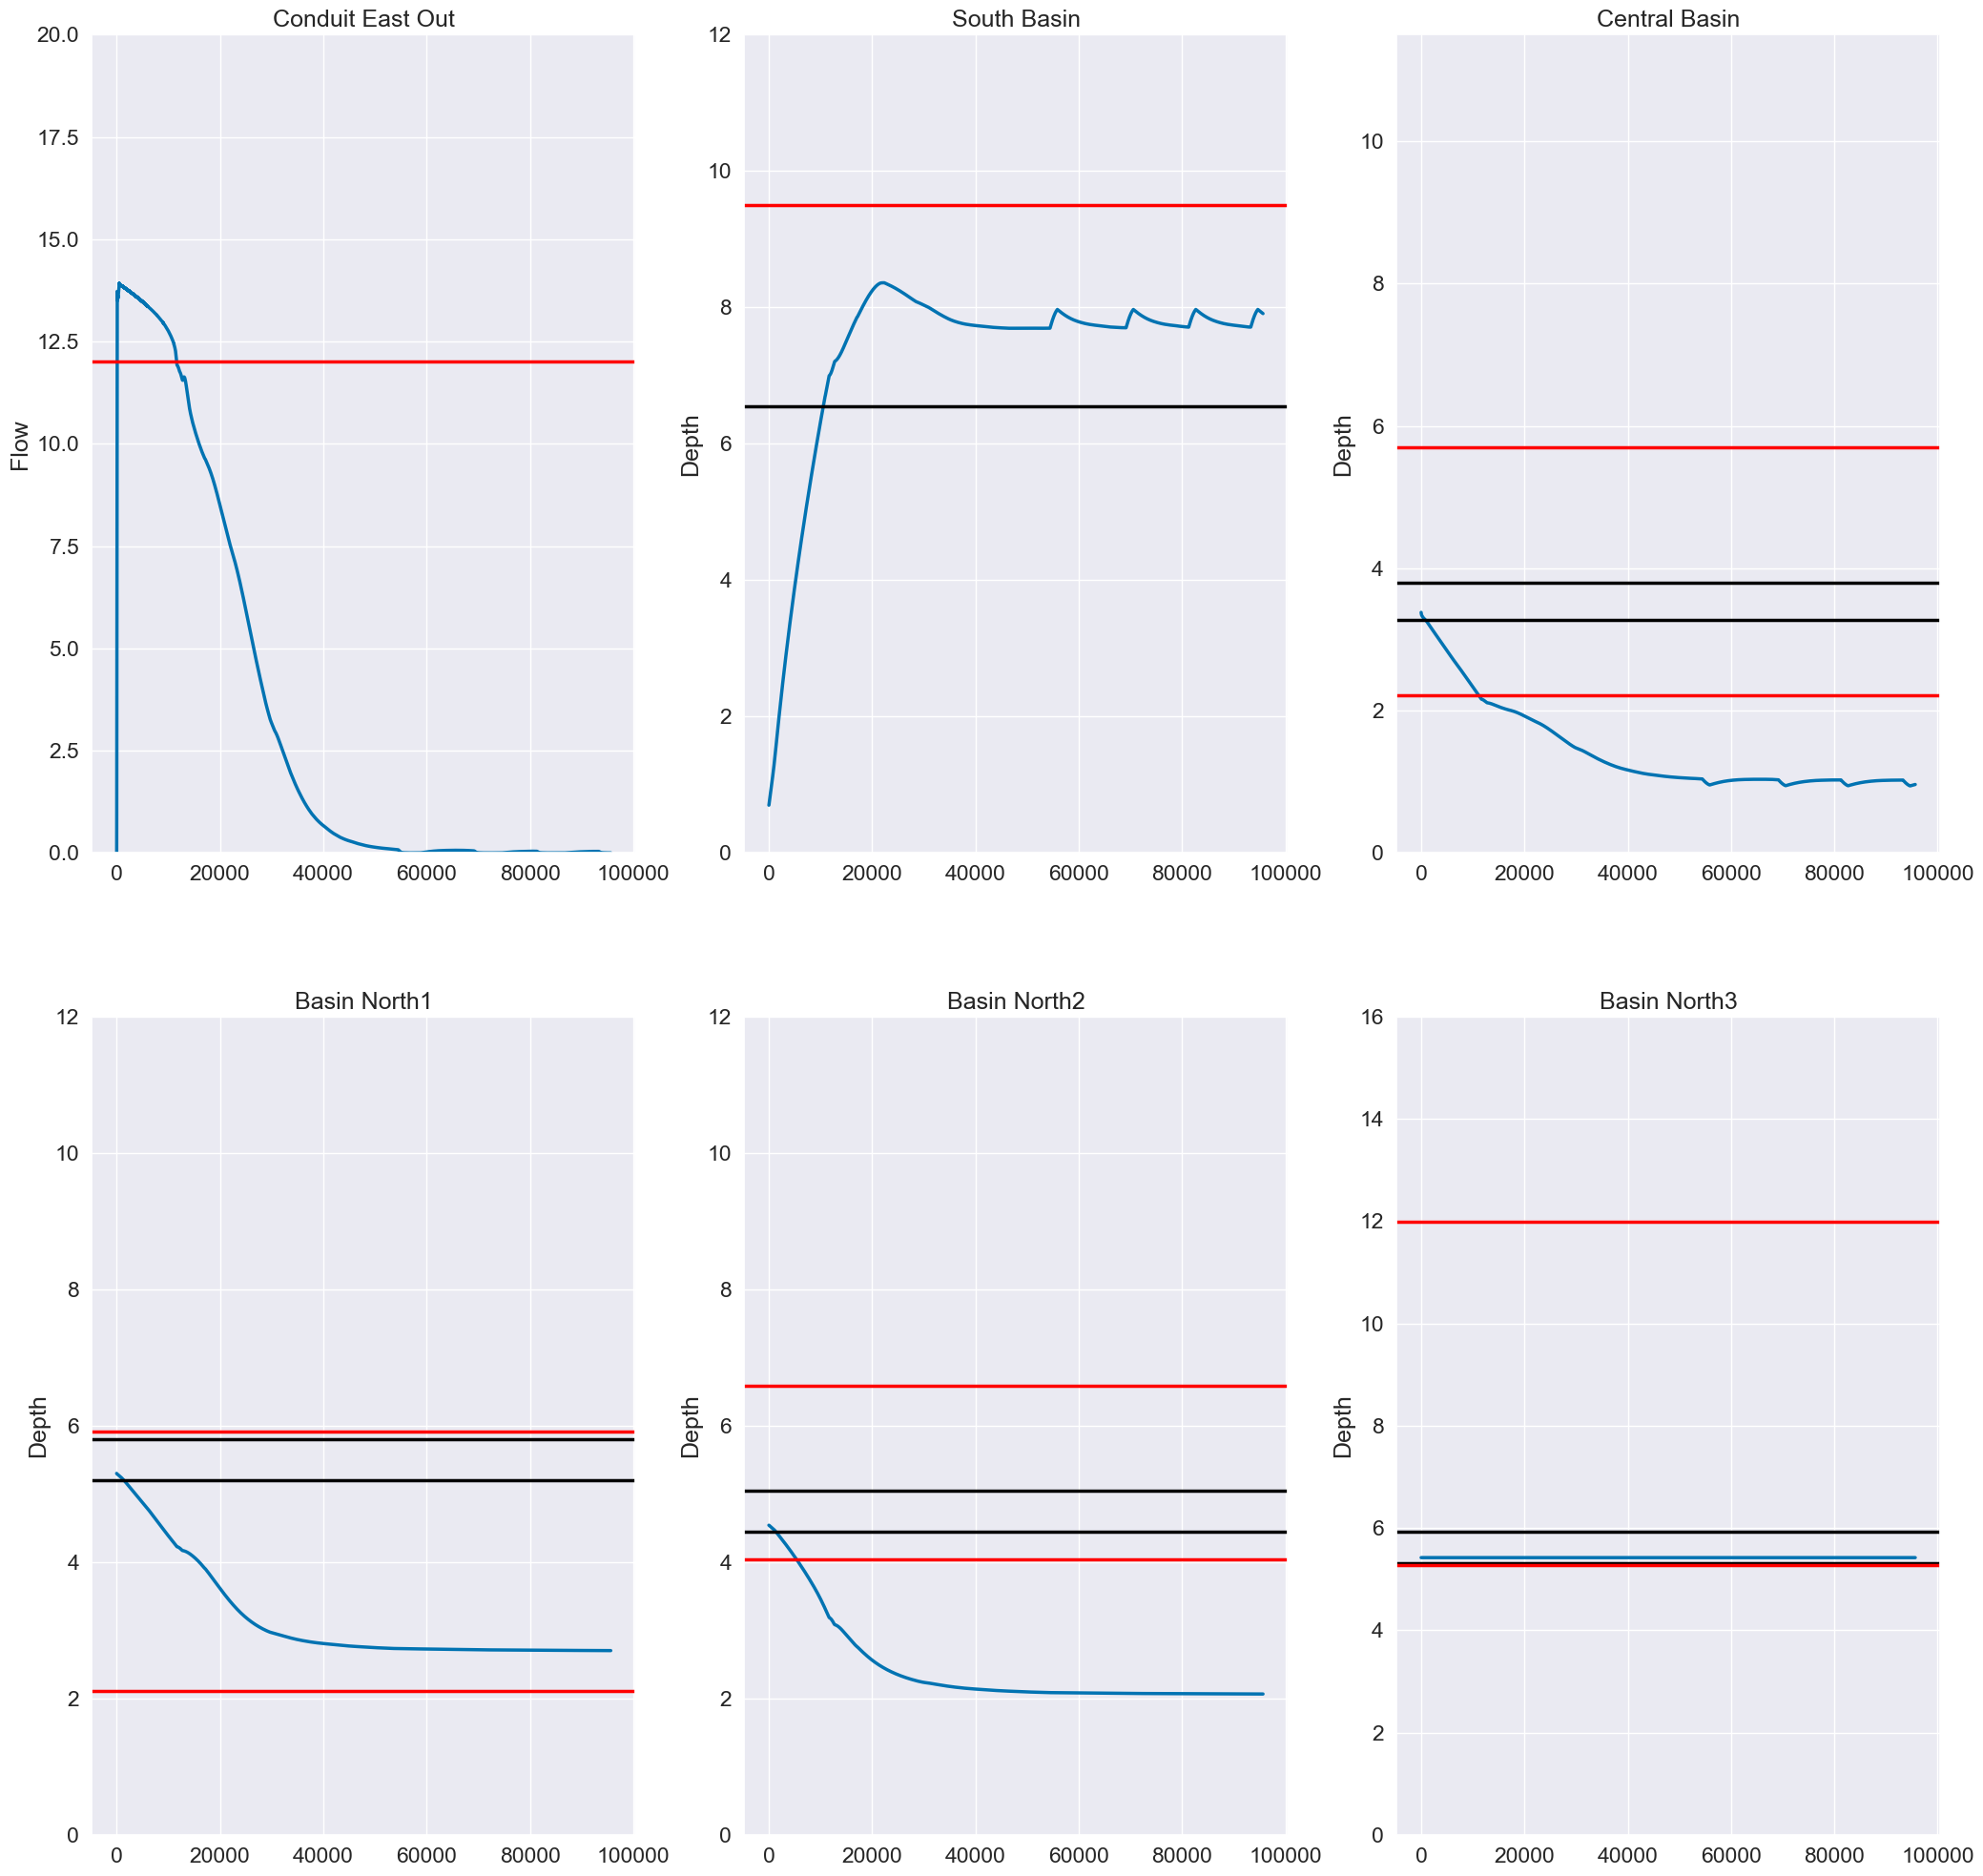

In [33]:
################################################################################
# Plotting
################################################################################
plt.rcParams['figure.figsize'] = [25, 25]

plotenvironment = env_uncontrolled_ones

plt.subplot(2, 3, 1)
plt.plot(plotenvironment.data_log["flow"]["conduit_Eout"], color=colors_hex[0])
plt.axhline(12.0, color="r")
plt.ylim([0,20])
plt.title("Conduit East Out")
plt.ylabel("Flow")

plt.subplot(2, 3, 2)
plt.plot(plotenvironment.data_log["depthN"]["basin_S"], color=colors_hex[0])
plt.axhline(9.5, color="r")
plt.axhline(6.55, color="k")
plt.ylim([0,12])
plt.ylabel("Depth")
plt.title("South Basin")

plt.subplot(2, 3, 3)
plt.plot(plotenvironment.data_log["depthN"]["basin_C"], color=colors_hex[0])
plt.axhline(5.7, color="r")
plt.axhline(3.8, color="k")
plt.axhline(3.28, color="k")
plt.axhline(2.21, color="r")
plt.ylim([0,11.5])
plt.ylabel("Depth")
plt.title("Central Basin")

plt.subplot(2, 3, 4)
plt.plot(plotenvironment.data_log["depthN"]["basin_N1"], color=colors_hex[0])
plt.axhline(5.92, color="r")
plt.axhline(2.11, color="r")
plt.axhline(5.8, color="k")
plt.axhline(5.2, color="k")
plt.ylim([0,12])
plt.ylabel("Depth")
plt.title("Basin North1")

plt.subplot(2, 3, 5)
plt.plot(plotenvironment.data_log["depthN"]["basin_N2"], color=colors_hex[0])
plt.axhline(6.59, color="r")
plt.axhline(5.04, color="k")
plt.axhline(4.44, color="k")
plt.axhline(4.04, color="r")
plt.ylim([0,12])
plt.ylabel("Depth")
plt.title("Basin North2")

plt.subplot(2, 3, 6)
plt.plot(plotenvironment.data_log["depthN"]["basin_N3"], color=colors_hex[0])
plt.axhline(11.99, color="r")
plt.axhline(5.92, color="k")
plt.axhline(5.32, color="k")
plt.axhline(5.28, color="r")
plt.ylim([0,16])
plt.ylabel("Depth")
plt.title("Basin North3")

plt.show()

As can be seen, by keeping the weirs completely open, the water levels in `Basin North1`, `Basin North2`, and `Central Basin` all drop to unacceptable levels.

## Example Control Strategy A

We define a basic equal filling degree control strategy as the following Python function:

In [10]:
################################################################################
# Controller one:  Equal filling degree
################################################################################
def controller_one(state, settings):
    actions = np.ones(5)

    # (north3, north2, north1, central, south)
    target = [5.42, 4.54, 5.3, 3.38, 6.5]
    max_desired = [5.92, 5.04, 5.8, 3.8, 6.55]
    min_desired = [5.32, 4.44, 5.2, 3.28, 0]
    max_allowed = [11.99, 6.59, 5.92, 5.7, 9.5]
    min_allowed = [5.28, 4.04, 2.11, 2.21, 0]

    thismax = max_allowed
    #thismax = max_desired
    thismin = min_allowed
    #thismin = min_desired

    states = [state[2], state[1], state[0], state[4], state[5]]
    states_normal = [state - min for (state, min) in zip(states, thismin)]
    range = [max - min for (max, min) in zip(thismax, thismin)]
    #
    fd = [(state/state_max) for (state, state_max) in zip(states_normal, range)]
    fd_average = sum(fd)/len(fd)
    potential = [filldeg - fd_average for filldeg in fd]
    #
    for i, ptnl in enumerate(potential):
        if ptnl < -0.001:
            potential[i] = 0
        elif ptnl < 0.001:
            potential[i] = fd_average
    #
    sum_potential = sum(potential)
    if sum_potential > 0.0:
        potential_new = [ptnl / sum_potential for ptnl in potential]
    #
    new_settings = np.zeros(5)
    new_state = [trgt * ptnl for (trgt, ptnl) in zip(target, potential_new)]
    for i, st in enumerate(states):
        if st > 0.00:
            new_settings[i] = min(1.0, new_state[i]/target[i])

    delta = 0.1
    if state[3] > 3.38:
        new_settings[4] = min(1.0, new_settings[4] + delta)
    else:
        if settings[4] > new_settings[4]:
            new_settings[4] = max(0.0, new_settings[4] - delta)
        elif settings[4] < new_settings[4]:
            new_settings[4] = min(1.0, new_settings[4] + delta)

    #print("The new setting is {} and the old setting is {}.".format(new_settings[4], settings[4]))

    new_settings[4] = 0.0
    if states[3] > 3.8:
        if states[4] > 9.5:
            new_settings[4] = 0.0
        elif states[4] > 6.55:
            new_settings[4] = 0.10
        else:
            new_settings[4] = 1.0

    return new_settings

(Note: Still to do for this function is adding in a "target value" for the outflow of the subnetwork)

We can check the performance with this control strategy by running the following:

In [11]:
# Run Equal Filling
env_equalfilling = pystorms.scenarios.delta()
done = False

actions_north3 = []
actions_north2 = []
actions_north1 = []
actions_central = []
actions_south = []
settings = np.ones(5)

while not done:
    state = env_equalfilling.state()
    actions =  controller_one(state, settings)
	#actions = controller_eqfill_two(state, settings)
    settings = actions
    actions_north3.append(actions[0])
    actions_north2.append(actions[1])
    actions_north1.append(actions[2])
    actions_central.append(actions[3])
    actions_south.append(actions[4])
    done = env_equalfilling.step(actions)

equalfilling_perf = sum(env_equalfilling.data_log["performance_measure"])

Let's check our performance with the new control strategy:

In [12]:
print("")
print("Performance for ones action   = {}".format(uncontrolled_perf_ones))
print("Performance for eqfill degree = {}".format(equalfilling_perf))


Performance for ones action   = 177043801214.479
Performance for eqfill degree = 82980353589.50336


As can be seen, our new stormwater strategy yield's our network a better performance. However, there hopefull is still a lot we can improve upon. Let's check the behavior of our network through the following plots:

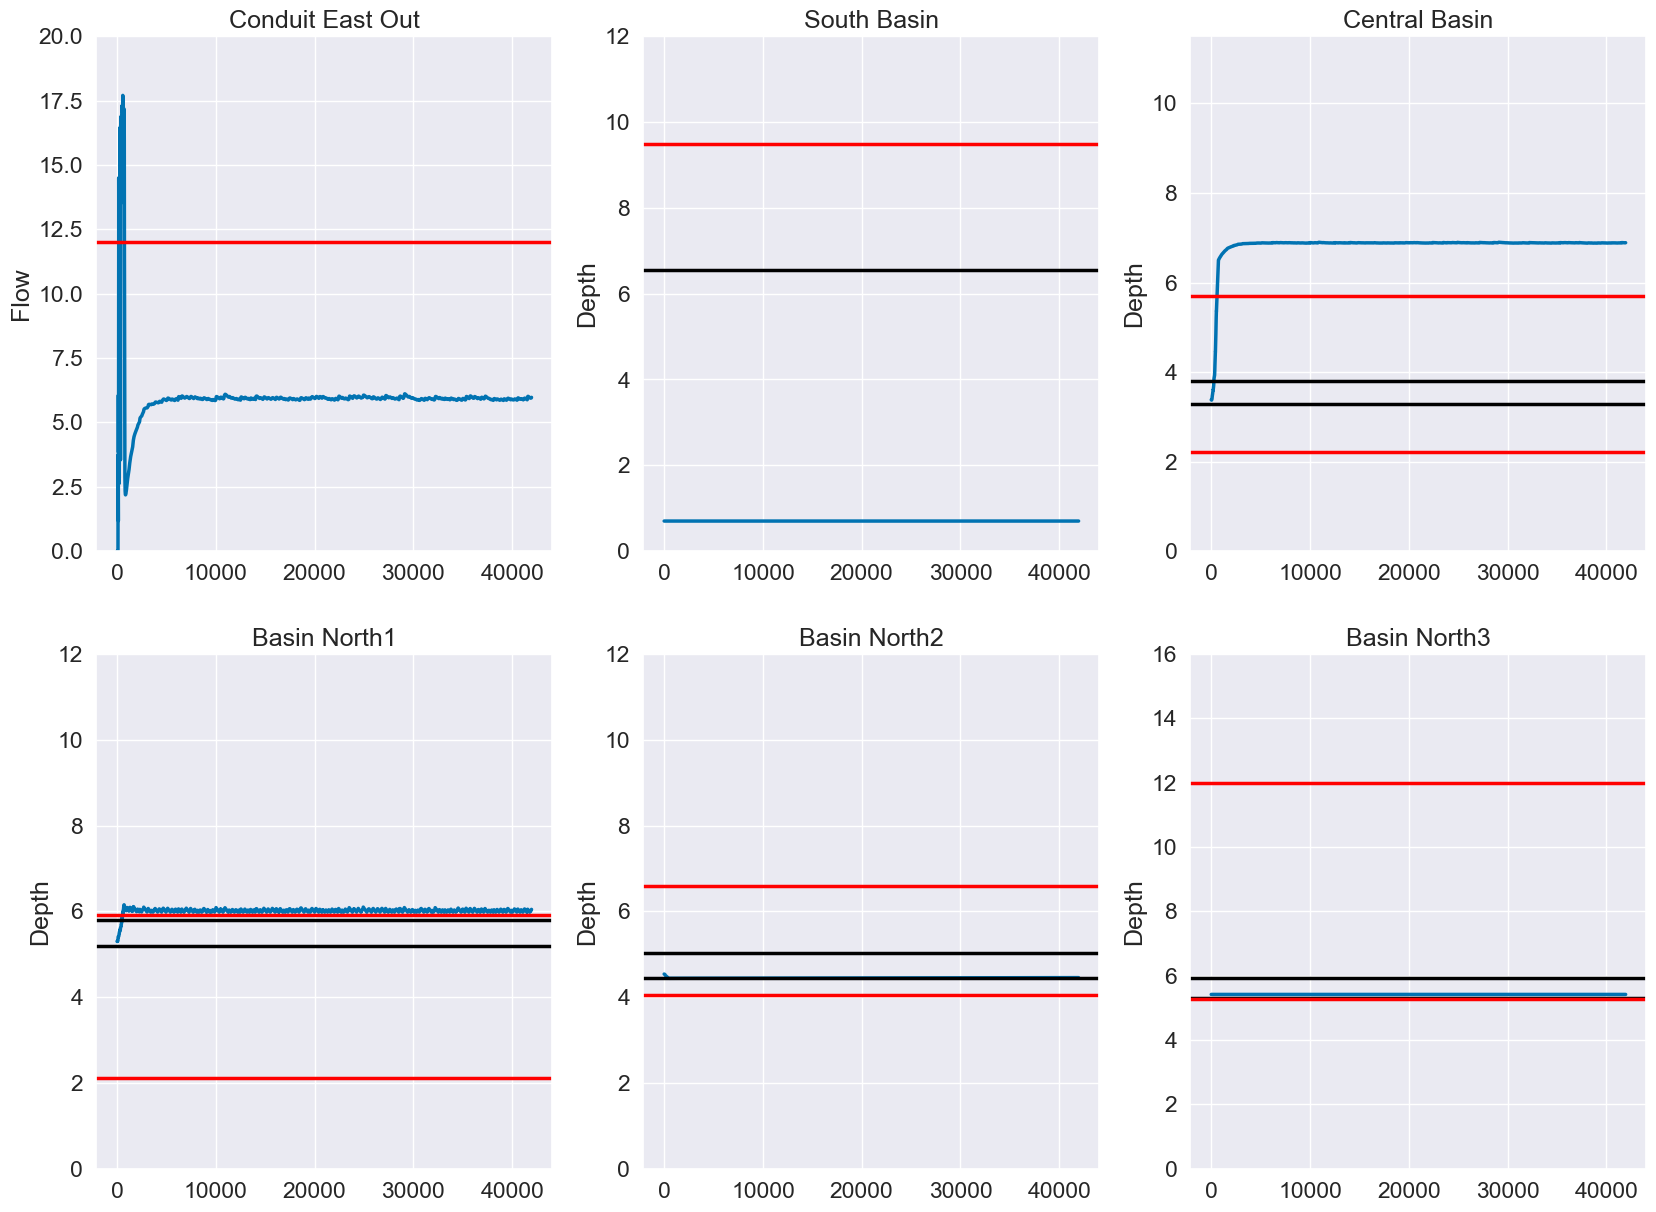

In [13]:
################################################################################
# Plotting
################################################################################
plt.rcParams['figure.figsize'] = [25, 25]

plotenvironment = env_equalfilling

plt.subplot(2, 3, 1)
plt.plot(plotenvironment.data_log["flow"]["conduit_Eout"], color=colors_hex[0])
plt.axhline(12.0, color="r")
plt.ylim([0,20])
plt.title("Conduit East Out")
plt.ylabel("Flow")

plt.subplot(2, 3, 2)
plt.plot(plotenvironment.data_log["depthN"]["basin_S"], color=colors_hex[0])
plt.axhline(9.5, color="r")
plt.axhline(6.55, color="k")
plt.ylim([0,12])
plt.ylabel("Depth")
plt.title("South Basin")

plt.subplot(2, 3, 3)
plt.plot(plotenvironment.data_log["depthN"]["basin_C"], color=colors_hex[0])
plt.axhline(5.7, color="r")
plt.axhline(3.8, color="k")
plt.axhline(3.28, color="k")
plt.axhline(2.21, color="r")
plt.ylim([0,11.5])
plt.ylabel("Depth")
plt.title("Central Basin")

plt.subplot(2, 3, 4)
plt.plot(plotenvironment.data_log["depthN"]["basin_N1"], color=colors_hex[0])
plt.axhline(5.92, color="r")
plt.axhline(2.11, color="r")
plt.axhline(5.8, color="k")
plt.axhline(5.2, color="k")
plt.ylim([0,12])
plt.ylabel("Depth")
plt.title("Basin North1")

plt.subplot(2, 3, 5)
plt.plot(plotenvironment.data_log["depthN"]["basin_N2"], color=colors_hex[0])
plt.axhline(6.59, color="r")
plt.axhline(5.04, color="k")
plt.axhline(4.44, color="k")
plt.axhline(4.04, color="r")
plt.ylim([0,12])
plt.ylabel("Depth")
plt.title("Basin North2")

plt.subplot(2, 3, 6)
plt.plot(plotenvironment.data_log["depthN"]["basin_N3"], color=colors_hex[0])
plt.axhline(11.99, color="r")
plt.axhline(5.92, color="k")
plt.axhline(5.32, color="k")
plt.axhline(5.28, color="r")
plt.ylim([0,16])
plt.ylabel("Depth")
plt.title("Basin North3")

plt.show()

The control settings are as follows:

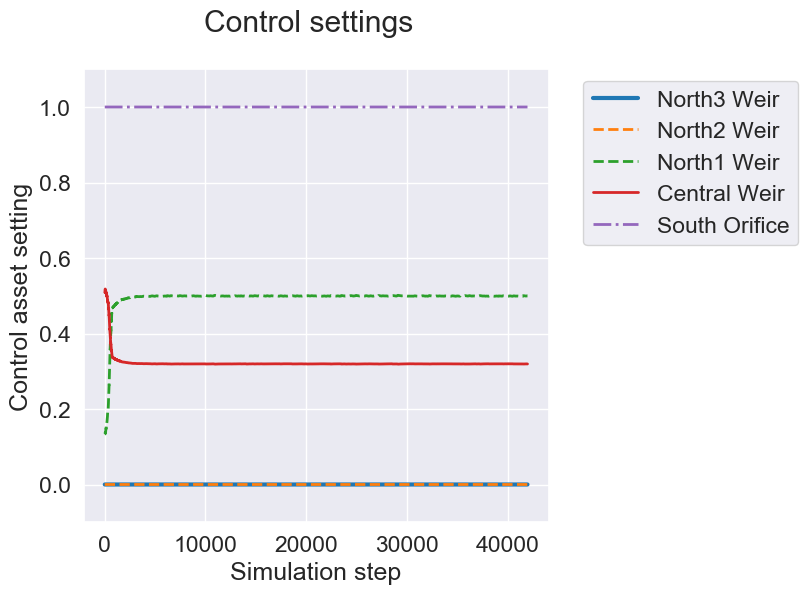

In [37]:
plt.rcParams['figure.figsize'] = [6, 6]

plt.plot(actions_north3, label='North3 Weir', linestyle='-', linewidth=3.0)
plt.plot(actions_north2, label='North2 Weir', linestyle='--', linewidth=2.0)
plt.plot(actions_north1, label='North1 Weir', linestyle='--', linewidth=2.0)
plt.plot(actions_central, label='Central Weir', linestyle='-', linewidth=2.0)
plt.plot(actions_south, label='South Orifice', linestyle='-.', linewidth=2.0)

plt.ylim([-0.1,1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle('Control settings')
plt.ylabel('Control asset setting')
plt.xlabel('Simulation step')
plt.show()

## Example Control Strategy B (todo)

We can update the control strategy from above to take into account the following:
- Update the control strategy for `Basin N1` to be more conservative with going over the upper limit (thus, more likely to drop below the lower limit)
- Update the control strategy for `Basin N2` and `Basin N3` in the opposite manner, that is, be more conservative with dropping below the lower limit (thus, more likely to allow the water level above the upper limit)
- Assign control settings based on a target value that is related to the outlet's outflow limit 


## Contents of configuration file for Scenario Delta

Configuration file for Scenario Delta
```
# name of scearnio 
name: delta
# state definitions
states:
      - !!python/tuple
        - "basin_C"
        - depthN
      - !!python/tuple
        - "basin_S"
        - depthN
      - !!python/tuple
        - "basin_N1"
        - depthN
      - !!python/tuple
        - "basin_N2"
        - depthN
      - !!python/tuple
        - "basin_N3"
        - depthN
      - !!python/tuple
        - "basin_N4"
        - depthN


# Action space
action_space:
        - "weir_E"
        - "orifice_S"
        - "weir_N"
        - "weir_N21"
        - "weir_N32"

# Performance Targets
performance_targets:
        # depth
        - !!python/tuple
          - "basin_C"
          - depthN
        - !!python/tuple
          - "basin_S"
          - depthN
        - !!python/tuple
          - "basin_N1"
          - depthN
        - !!python/tuple
          - "basin_N2"
          - depthN
        - !!python/tuple
          - "basin_N3"
          - depthN
        # flooding
        - !!python/tuple
          - "junc_Eout"
          - flooding
        - !!python/tuple
          - "junc_EinflowA"
          - flooding
        - !!python/tuple
          - "junc_Csc"
          - flooding
        - !!python/tuple
          - "junc_Ssc"
          - flooding
        - !!python/tuple
          - "junc_N1sc"
          - flooding
        - !!python/tuple
          - "junc_N2sc"
          - flooding
        - !!python/tuple
          - "junc_N3sc"
          - flooding
        - !!python/tuple
          - "junc_N4sc"
          - flooding
        # flow
        - !!python/tuple
          - "conduit_Eout"
          - flow
        - !!python/tuple
          - "orifice_E"
          - flow
        - !!python/tuple
          - "orifice_N"
          - flow
        - !!python/tuple
          - "orifice_N21"
          - flow
        - !!python/tuple
          - "orifice_N32"
          - flow
```

## Code button box

(Scratch code not currently being used)

In [4]:
################################################################################
# Uncontrolled performance - control asset settings are set to all zeros
################################################################################
env_uncontrolled_zeros = pystorms.scenarios.delta()
done = False
actions = np.zeros(5)
while not done:
    done = env_uncontrolled_zeros.step(actions)
uncontrolled_perf_zeros = sum(env_uncontrolled_zeros.data_log["performance_measure"])